In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sb

In [2]:
df = pd.read_excel('big_mac.xlsx') 

In [3]:
df.head()

,big_mac_price,hourly_wages_usd
0,1.42,1.70
1,1.86,7.80
2,1.48,2.05
3,3.14,12.30
4,2.21,9.35


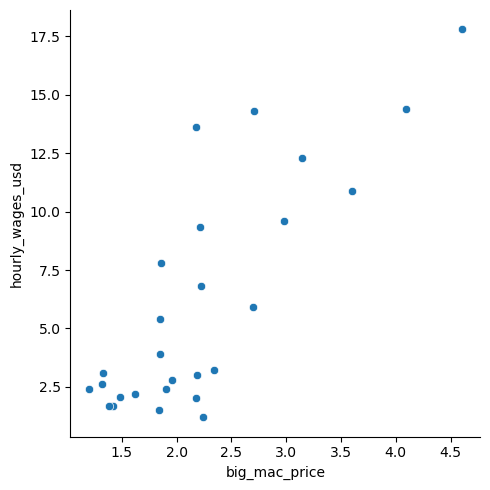

In [4]:
#using seaborn to visualize data, use scatterplot
sb.relplot(x='big_mac_price',y='hourly_wages_usd',data=df)
plt.show()

In [5]:
#Building linear regression model
import statsmodels.api as sm

In [6]:
model = sm.OLS.from_formula('hourly_wages_usd~big_mac_price',data=df)

In [7]:
result = model.fit()

In [8]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       hourly_wages_usd   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     48.88
Date:                Fri, 09 Dec 2022   Prob (F-statistic):           2.50e-07
Time:                        01:37:56   Log-Likelihood:                -66.251
No. Observations:                  27   AIC:                             136.5
Df Residuals:                      25   BIC:                             139.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -4.5397      1.619     -2.805      0.010      -7.873      -1.206
big_mac_price     4.7435      0.678      6.991      0.000       3.346       6.141
==============================================================================
Omnibus:                        5.597   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                3.761
Skew:                           0.829   Prob(JB):                        0.153
Kurtosis:                       3.771   Cond. No.                         7.94
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
# n= number of samples, k=number of independent features, degree of freedom = n-1-k = 25
# Hypothesis testing : t-test
# p value - 0.010 < 0.025 (with 95% confidence interval)
# p value - 0.00 < 0.025 ------> Hence, H0 is False and H1 is True

In [10]:
fitted_values = -4.5397 + 4.7435 * df['big_mac_price']

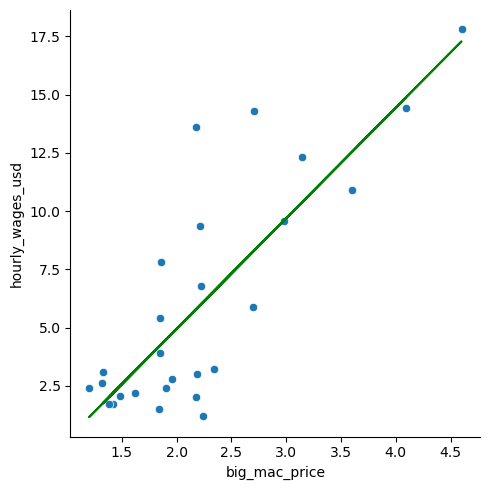

In [11]:
sb.relplot(x='big_mac_price',y='hourly_wages_usd',data=df)
plt.plot(df['big_mac_price'],fitted_values,'g-')
plt.show()

In [12]:
#ANOVA - Analysis of Variance - Are the variance of fitted and true (actual) values are equal
# F statistics - F value is 48.88 and corresponding p-value is Prob (F-statistic):	2.50e-07 < 0.025 
# F value will test for variance. 
# Are the variance of fitted and true values are equal? -- Yes
# this indicates significance of the model

In [13]:
# calculate F-statistics manually, ssr = variance of fitted values, sse - varinace of 
ssr = np.sum(np.square(fitted_values - fitted_values.mean()))
sse = np.sum(np.square(fitted_values - df['hourly_wages_usd'].values))

In [14]:
ssr, sse

(418.1817241247, 213.88429646337502)

In [15]:
df_ssr = 1 # k (no. of independent features)
df_sse = 27 - 1 - df_ssr

In [16]:
F_stats = (ssr/df_ssr)/(sse/df_sse)
F_stats

48.879432833479235

In [17]:
# R -squared value
sst = sse+ ssr 

r_square = 1 - (sse/sst)
print('R Square Value =',r_square)

R Square Value = 0.6616108294124452


In [18]:
# correlation (r)
df.corr()

,big_mac_price,hourly_wages_usd
big_mac_price,1.000000,0.813396
hourly_wages_usd,0.813396,1.000000
